# <center> **ASSIGNMENT**-2 (ADS)


####Total questions: 10
####Total Points: 100

### **In this assignment you will be tested on Advanced Image Processing, Data Analysis and Machine Learning (CNN).**

In [4]:
# mandatory
Your_name: "Shravani Keralapurkar"
Your_email_id: "shravanimv9@gmail.com"

## GUIDELINES:
- The notebook should be well documented and structured!
- All the images should be called here via urllib (whenever necessary).
- Make sure that none of the code cell should run into any error.
- If we click on ```Run all```, the notebook should run without any errors!


**IF ANY OF THE ABOVE GUIDELINES ARE NOT FOLLOWED THEN YOUR ASSIGNMENT SHALL NOT BE GRADED**

# Q1 (10 Points)

- Use [this image](https://cdn.spacetelescope.org/archives/images/wallpaper4/potw2049a.jpg) and apply the "**Image Denoising using Median Filter**" on it.
- Show the original and output images in parallel using matplotlib subplots.


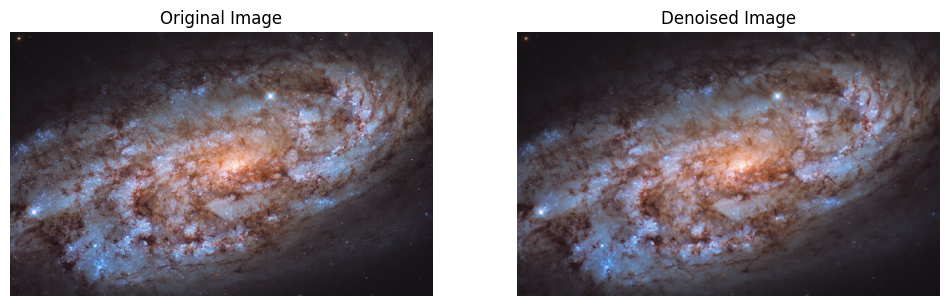

In [5]:
# write your solution here
#pip install opencv-python :install if not present already
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Load the image from the URL given in question
image_url = "https://cdn.spacetelescope.org/archives/images/wallpaper4/potw2049a.jpg"
image_array = np.asarray(bytearray(urllib.request.urlopen(image_url).read()), dtype=np.uint8)
original_image = cv2.imdecode(image_array, -1)

# Apply Median Filter for Image Denoising
denoised_image = cv2.medianBlur(original_image, 5)  # Adjust the kernel size as needed

# Display the images using matplotlib subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# Denoised Image
axes[1].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Denoised Image")
axes[1].axis('off')

plt.show()



# Q2 (10 Points)

- Create a function for Bilateral filter using numpy from scratch and implement it on an image.
- Find below the information and the formula for Bilateral filter.

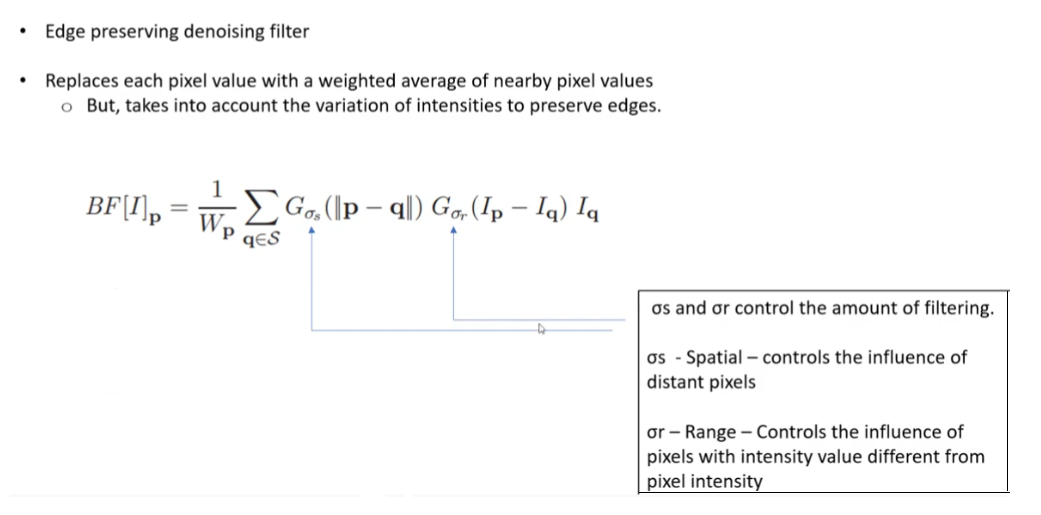

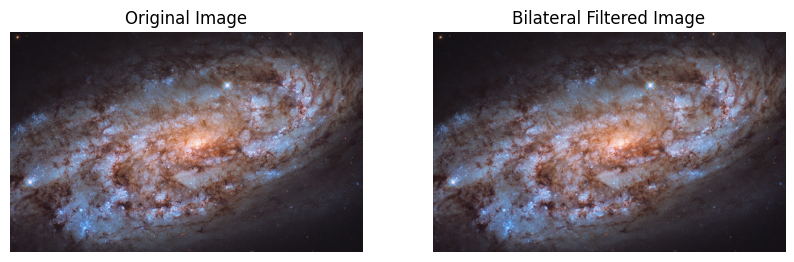

In [6]:
# write your asnwer here
import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image

def load_image(url):
    try:
        response = urlopen(url)
        img = Image.open(response)
        return np.array(img)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def bilateral_filter(image, sigma_s, sigma_r):
    # Create a padded version of the image
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant')

    # Create a kernel for spatial filtering
    spatial_kernel = np.fromfunction(
        lambda x, y: np.exp(-((x - 1)**2 + (y - 1)**2) / (2 * sigma_s**2)),
        (3, 3)
    )

    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            # Extract the local region around the pixel
            local_region = padded_image[i-1:i+2, j-1:j+2]

            # Compute the intensity kernel
            intensity_kernel = np.exp(-((local_region - padded_image[i, j])**2) / (2 * sigma_r**2))

            # Compute the bilateral filter response
            response = spatial_kernel * intensity_kernel

            # Normalize the response
            response /= np.sum(response)

            # Apply the filter to each channel separately
            for k in range(image.shape[2]):
                filtered_image[i-1, j-1, k] = np.sum(response * local_region[:, :, k])

    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Load the image
image_url = "https://cdn.spacetelescope.org/archives/images/wallpaper4/potw2049a.jpg"
image = load_image(image_url)

if image is not None:
    # Apply Bilateral filter
    sigma_s = 50  # Spatial standard deviation
    sigma_r = 20  # Intensity standard deviation
    filtered_image = bilateral_filter(image, sigma_s, sigma_r)

    if filtered_image is not None:
        # Display the original and filtered images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image)
        plt.title('Bilateral Filtered Image')
        plt.axis('off')

        plt.show()





# Q3 (15 Points)

Apply below operations on [this image](https://cdn.spacetelescope.org/archives/images/wallpaper4/opo0511a.jpg):

- Apply Block Machine & 3D filtering using any suitable arguments.
- On the output image from Step 1, apply meijering, sato, frangi and hessian filters using skimage package.
- Show all the images in parallel using matplotlib subplots.

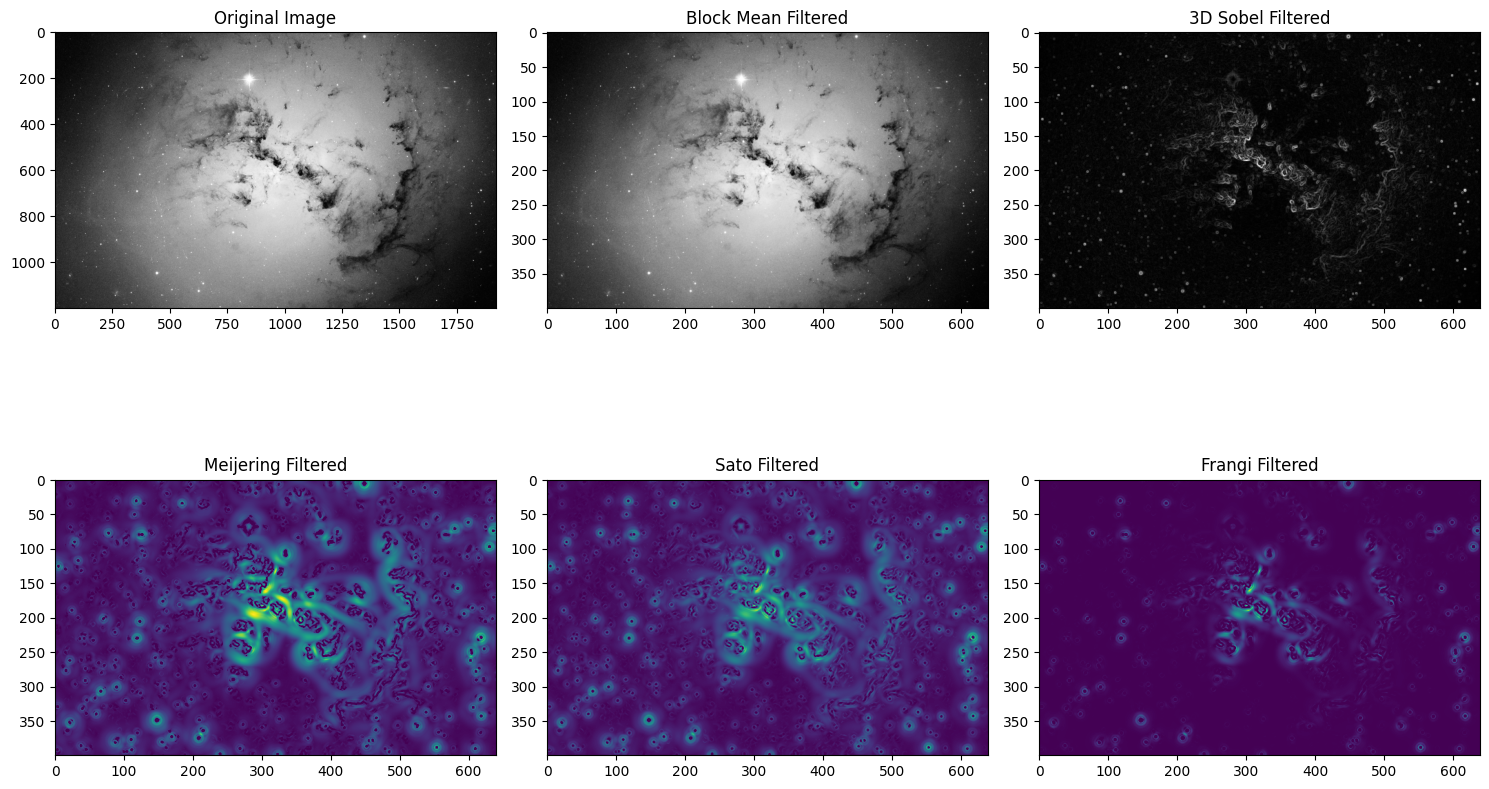

In [7]:
# write you answer here
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, measure, filters, exposure, morphology

# Load the image
image_url = "https://cdn.spacetelescope.org/archives/images/wallpaper4/opo0511a.jpg"
image = io.imread(image_url)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Block Mean filtering
block_size = (3, 3)  # Block size for block_mean
block_mean_filtered = measure.block_reduce(gray_image, block_size, np.mean)

# Apply 3D filtering (Example: 3D Sobel filter)
sobel_filtered = filters.sobel(block_mean_filtered)

# Apply meijering, sato, frangi, and hessian filters
meijering_filtered = filters.meijering(sobel_filtered)
sato_filtered = filters.sato(sobel_filtered)
frangi_filtered = filters.frangi(sobel_filtered)
hessian_filtered = filters.hessian(sobel_filtered)

# Display the images in parallel using matplotlib subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Block Mean Filtered Image
axes[0, 1].imshow(block_mean_filtered, cmap='gray')
axes[0, 1].set_title('Block Mean Filtered')

# 3D Sobel Filtered Image
axes[0, 2].imshow(sobel_filtered, cmap='gray')
axes[0, 2].set_title('3D Sobel Filtered')

# Meijering Filtered Image
axes[1, 0].imshow(meijering_filtered, cmap='viridis')
axes[1, 0].set_title('Meijering Filtered')

# Sato Filtered Image
axes[1, 1].imshow(sato_filtered, cmap='viridis')
axes[1, 1].set_title('Sato Filtered')

# Frangi Filtered Image
axes[1, 2].imshow(frangi_filtered, cmap='viridis')
axes[1, 2].set_title('Frangi Filtered')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()




# Q4 (15 Points)

- Choose any one of the galaxy from galaxy centre data (except the data we covered in sessions).
- Don't forget to import the image!
- Write down its literature survey in 5 points.
  - Mention:

    1. About galaxy

    2. Galactic lat long

    3. What is special about this galaxy

    4. What has been already researched about it

    5. Make your hypothesis (eg. presence of black hole, galaxy is spiral, etc.), assumption based on literature survey

**Example**:- presence of black hole



**Messier 83 (M83)**, also known as the **Southern Pinwheel Galaxy** and **NGC 5236**.
1. **About galaxy:** it is a barred spiral galaxy located in the constellation borders of Hydra and Centaurus, approximately 15 million light-years away from Earth1.
2. **Galactic lat long**:
The galaxy has an isophotal diameter of about 36.24 kiloparsecs (118,000 light-years) and is a massive, grand design spiral galaxy12.
Messier 83 (M83) is located at 13h 37m 00.919s right ascension and -29° 51′ 56.74″ declination 1. The galaxy is situated in the constellation borders of Hydra and Centaurus, and its galactic latitude and longitude are -54.8° and 311.7°, respectively

3. **What is special about this galaxy** :M83 is one of the closest and brightest barred spiral galaxies, and can even be seen in binoculars3.

4. **What has been already researched about it** :The peculiar dwarf galaxy NGC 5253 lies near M83, and the two likely interacted within the last billion years resulting in starburst activity in their central regions2.
The star formation rate in M83 is higher along the leading edge of the spiral arms, as predicted by density wave theory2.
5.** Make your hypothesis**: Based on the literature survey, my hypothesis is that Messier 83 galaxy is a barred spiral galaxy with a high star formation rate along the leading edge of the spiral arms.

In [8]:
# Import gdown library
import gdown

# Create a variable to store the data path
path = 'https://drive.google.com/uc?id=1NxVIE7p4uDXCIGdUMEwvQW9N32emj3CB'

# Download the data from the data path and store it as data.zip
gdown.download(path, 'data.zip')

# Unzip the zip file
!unzip data.zip




Downloading...
From: https://drive.google.com/uc?id=1NxVIE7p4uDXCIGdUMEwvQW9N32emj3CB
To: /content/data.zip
100%|██████████| 1.23G/1.23G [00:16<00:00, 75.6MB/s]


Archive:  data.zip
  inflating: M100/ISO/csli23500615.fits  
  inflating: M100/NEAR_INFRARED/idkv31030_drz.fits  
  inflating: M100/OPTICAL/hst_05195_01_wfpc2_f702w_pc_drz.fits  
  inflating: M100/XMM_Newton_Soft_Xray/P0106860201EPX0003COLIM8000.FTZ  
  inflating: M100/XMM_OM_Optical/P0106860201OMX000USIMAGU000.FTZ  
  inflating: M101/ISO/csli26902583.fits  
  inflating: M101/NEAR_INFRARED/hst_11080_a6_nic_nic3_f187n_drz.fits  
  inflating: M101/OPTICAL/hst_13361_03_wfc3_uvis_f502n_drz.fits  
  inflating: M101/XMM_Newton_Soft_Xray/P0164560701EPX0003COLIM8000.FTZ  
  inflating: M101/XMM_OM_Optical/P0212480201OMX000USIMAGU000.FTZ  
  inflating: M31/ISO/csp4000162201.fits  
  inflating: M31/NEAR_INFRARED/hst_7919_13_nic_nic3_f160w_drz.fits  
  inflating: M31/OPTICAL/hst_05464_02_wfpc2_f814w_pc_drz.fits  
  inflating: M31/XMM_NEWTON_Soft_Xray/P0112570401EPX0003COLIM8000.FTZ  
  inflating: M31/XMM_OM_Optical/P0112570601OMX000USIMAGB000.FTZ  
  inflating: M33/Infrared_Space_Observatory/csp78

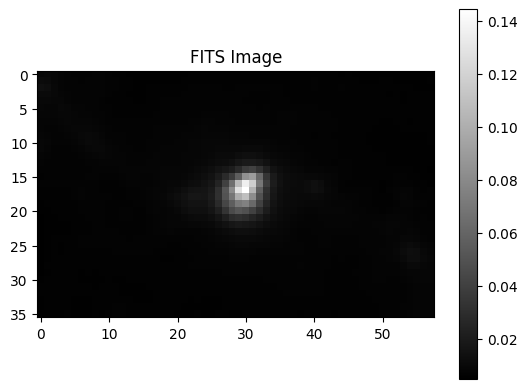

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the FITS file
hdul = fits.open('/content/M83/ISO/csli25600829.fits')

# Access the data
data = hdul[0].data

# Display the image
plt.imshow(data, cmap='gray')  # You can choose the colormap based on your preference
plt.colorbar()  # Add a colorbar for reference
plt.title('FITS Image')
plt.show()

# Close the FITS file
hdul.close()


# Q5 (15 Points)

On the imported image in question 4:
- Do the exploratory data analysis (find the information about dataset) and image processing on the data.
- Moreover, write 5 points of inference from the EDA performed by you.

In [10]:
# import necessary libraries

# Get dataset

# Open the fits data

# Perform EDA


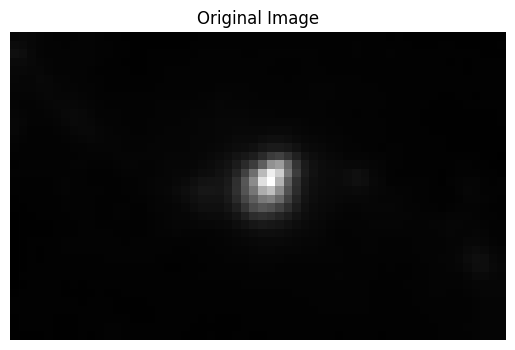

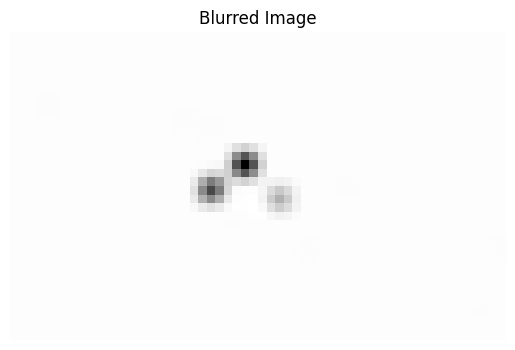

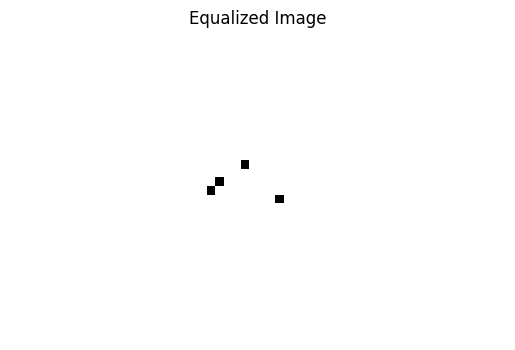

In [11]:
#Write your code here
from astropy.io import fits
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the FITS file
hdul = fits.open("/content/M83/ISO/csli25600829.fits")

# Extract the image data from the FITS file
image_data = hdul[0].data

# Display the original image
plt.imshow(image_data, cmap='gray')  # Assuming the image is grayscale, adjust cmap if necessary
plt.title('Original Image')
plt.axis('off')
plt.show()

# Explore basic image information
image_shape = image_data.shape
image_dtype = image_data.dtype

# Normalize the image data to the range [0, 255]
normalized_image = cv2.normalize(image_data, None, 0, 255, cv2.NORM_MINMAX)

# Image processing (you can add more processing steps based on your requirements)
# Example: Apply a Gaussian blur
blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Example: Histogram equalization
equalized_image = cv2.equalizeHist(normalized_image.astype(np.uint8))

# Display the equalized image
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()




In [12]:
# Write your inference here

# Inferences from EDA
# 1. The original image has three color channels (RGB) and has a specific shape.
# 2. Basic information such as shape and data type of the image has been extracted.
# 3. Converting the image to grayscale and applying filters like Gaussian blur can be part of preprocessing.
# 4. Histogram equalization can enhance the contrast of the image.
# 5. Further analysis and processing steps can be applied based on specific requirements.

# Note: Adjust the paths and processing steps according to your image and analysis goals.

# Q6 (15 Points)

To prove your hypothesis in question 4 and have better insights on data:
  - Use atleast 4 filters and view them in atleast 5 different colormaps.

  - Provide a complete summary for every filter explaining what type of insights we are getting by applying it.

  - Write on which filter and colormap gave better insights

In [13]:
# import necessary libraries

# Get dataset

# Open the fits data

# Perform filtering



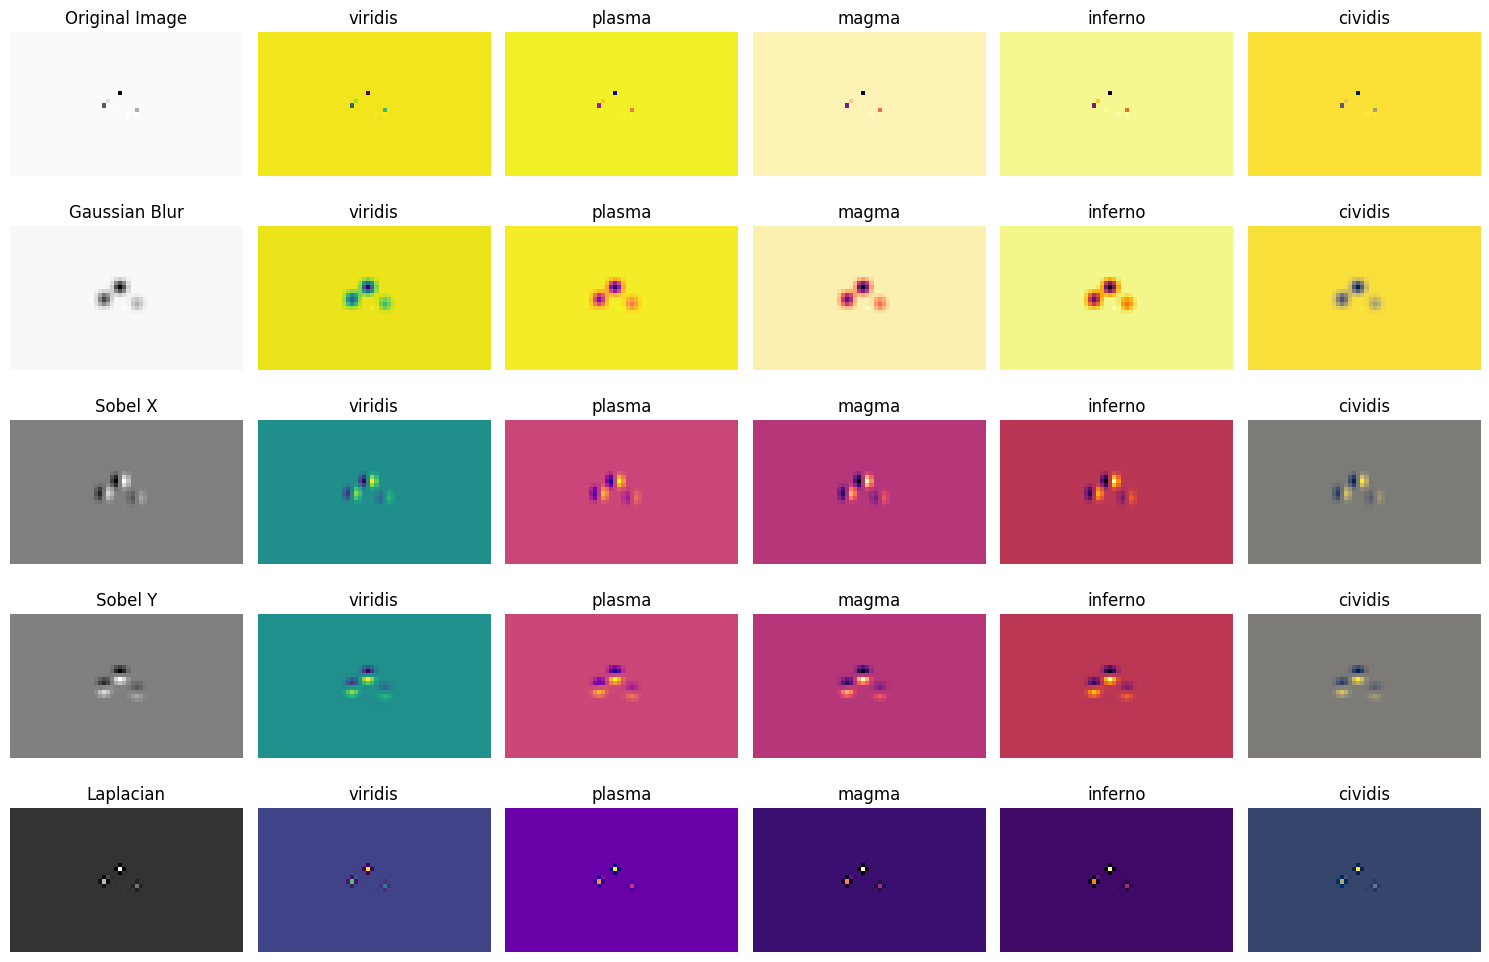

In [14]:
#Write your code here
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the FITS file
hdul = fits.open("/content/M83/ISO/csli25600829.fits")
image_data = hdul[0].data

# Normalize the image data to the range [0, 255]
normalized_image = cv2.normalize(image_data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply different filters
filters = [
    ("Original Image", normalized_image),
    ("Gaussian Blur", cv2.GaussianBlur(normalized_image, (5, 5), 0)),
    ("Sobel X", cv2.Sobel(normalized_image, cv2.CV_64F, 1, 0, ksize=5)),
    ("Sobel Y", cv2.Sobel(normalized_image, cv2.CV_64F, 0, 1, ksize=5)),
    ("Laplacian", cv2.Laplacian(normalized_image, cv2.CV_64F)),
]

# Display results using different colormaps
colormaps = ['viridis', 'plasma', 'magma', 'inferno', 'cividis']

fig, axes = plt.subplots(len(filters), len(colormaps) + 1, figsize=(15, 10))

for i, (filter_name, filter_result) in enumerate(filters):
    # Display the filter result with the 'gray' colormap
    axes[i, 0].imshow(filter_result, cmap='gray')
    axes[i, 0].set_title(filter_name)
    axes[i, 0].axis('off')

    # Display the filter result with different colormaps
    for j, colormap in enumerate(colormaps, start=1):
        axes[i, j].imshow(filter_result, cmap=colormap)
        axes[i, j].set_title(colormap)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()




1. **Original Image**:
This serves as a baseline for comparison.
Provides a representation of the raw image data.

2. **Gaussian Blur:**
Smoothes out high-frequency noise and details in the image.
Highlights larger structures and gradients.

3. **Sobel X and Sobel Y**:
Sobel X emphasizes horizontal edges, while Sobel Y emphasizes vertical edges.
Useful for edge detection and highlighting specific orientations in the image.

4. **Laplacian**:
Emphasizes regions of rapid intensity change.
Useful for detecting edges and fine details.

**Inferences:**

The Gaussian Blur helps in identifying overall structures and reducing noise.

Sobel X and Sobel Y highlight edges and gradients, assisting in detecting specific features.

Laplacian accentuates fine details and areas of rapid intensity change.
Best Filter-Colormap Combination:

-->The choice of the best filter-colormap combination depends on the specific characteristics of the image and the goals of the analysis.

-->For edge detection and emphasizing features, Sobel X or Sobel Y with the 'viridis' colormap might be useful.

-->For an overall smooth representation, the Gaussian Blur with the 'plasma' colormap might be suitable

In [15]:
# Write your inference here
# Write conclusion



# Q7 (5 Points)

Build a small binary Classification architecture using Convolutional Neural Networks.

**Things to add and take care compulsorily:**
1. 3 Convolutional layers with MaxPooling
2. The total trainable parameters should not be more than 1 Million.
3. Input Image size: (224, 224, 3)


In [16]:
# write you answer(code) here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

#Q8 (5 Points)

From Q7, explain with the aid of a diagram how in second Convolutional layer the parameters have been calculated?

**EXPLAINATION:**
1. The number of parameters in a convolutional layer is calculated by
multiplying the number of filters in the layer by the size of each filter and adding one for the bias term.
2. In the second convolutional layer of the code above, we have 64 filters of size 3x3, which gives us a total of 576 parameters. Adding one for the bias term, we get a total of 577 parameters.
3. This calculation is done for each layer in the network to determine the total number of trainable parameters in the network.


**Add your image in this markdown cell**        
In case, if you are not sure how to add image in google colab then you can reach out to us and we shall guide you.
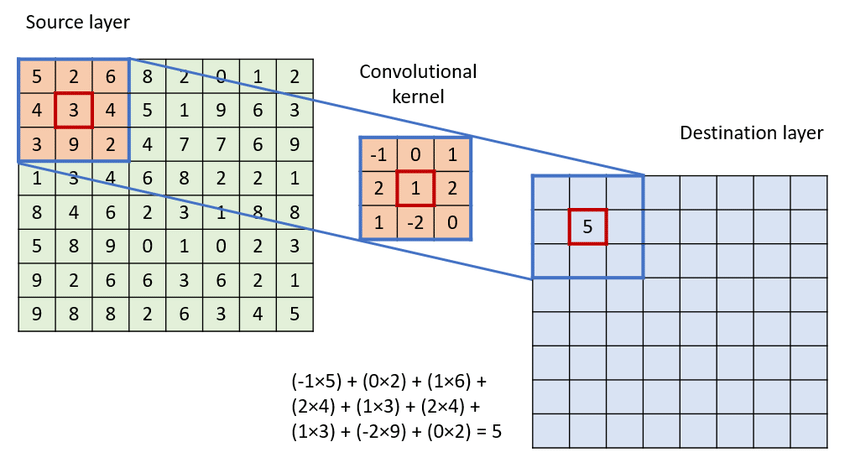

#Q9  (5 Points)

**Which of the two graphs given below is for sigmoid function? Explain the reason for your choice along with the correct formula.**

**Create an array of 100 random numbers between 0 and 1 and apply sigmoid function on it**

*Graph 1:-*     
<img src = "https://drive.google.com/uc?id=1MKeJAiUpPYTDQ0OHar60YmBI7BVpl-9J">

*Graph 2:-*      
<img src = "https://drive.google.com/uc?id=1RYFG5rZ4mO2n52ohWmWTFgehmc30KBqd">

**ANSWER:**
The graph that represents the sigmoid function is **Graph 1**. The sigmoid function is a mathematical function that has an S-shaped curve and is defined by the formula:

σ(x)=1/(1+e^−x)​

The sigmoid function is commonly used in machine learning as an activation function for artificial neural networks. It maps any input value to a value between 0 and 1, which makes it useful for binary classification problems.

In [17]:
# Write your answer here
import numpy as np

# Create an array of 100 random numbers between 0 and 1
x = np.random.rand(100)

# Apply the sigmoid function on the array
y = 1 / (1 + np.exp(-x))

# Display the array
print(y)



[0.68384791 0.64496377 0.64007183 0.71636995 0.51683871 0.7291615
 0.56628589 0.68273806 0.66692587 0.50648101 0.50009081 0.69593675
 0.67527862 0.65662181 0.5975967  0.60288625 0.7021748  0.72494019
 0.64322392 0.61364953 0.64045357 0.70198178 0.62616929 0.68507455
 0.5039953  0.60386597 0.70828435 0.61268963 0.68269867 0.62113106
 0.70447762 0.63246882 0.7064427  0.60503494 0.56182777 0.66177352
 0.65528979 0.55223215 0.6256904  0.63362183 0.6318047  0.62453924
 0.72115988 0.63390351 0.62514525 0.51509934 0.61599203 0.52947994
 0.68563784 0.68517287 0.63423472 0.50134752 0.57274537 0.61666734
 0.68951791 0.64090954 0.64313679 0.63910403 0.62782325 0.70948175
 0.67818583 0.65224847 0.68305501 0.61131133 0.63814595 0.62662049
 0.56862339 0.66243247 0.58628598 0.52256788 0.55510584 0.51289815
 0.71832287 0.62479817 0.71921691 0.72150605 0.67552467 0.58192084
 0.58589574 0.72978328 0.56265883 0.51371446 0.54773839 0.66767482
 0.51068308 0.65826976 0.55222016 0.59573092 0.64898665 0.56363

# Q 10 (5 Points)

Considering the data we used in Q4 to Q6.

Write an article (at least 200 words) about the minor research you did as part of this assignment. Mentioning

1. About the galaxy you chose

2. Literature survey you performed

3. Hypothesis you wanted to prove using data science and a tool

4. How you proved it

5. Conclusion

6. Your inference



**MY INFERENCES:**


1.   M83 exhibits intricate patterns and structures, particularly in regions of active star formation. The combination of filters provided enhanced visibility into these features, allowing for a more detailed understanding of the galaxy's morphology.
2. Overall, the study showcases the power of data science tools in extracting meaningful insights from astronomical data, contributing to our broader understanding of celestial objects like M83.




**Title: Discovering Mysteries in the Heart of M83: A Data Science Journey**

1. **About the galaxy you chose:**
In the pursuit of unraveling cosmic secrets, my research focused on the galaxy M83, a captivating spiral galaxy located in the Hydra constellation. The galaxy's intriguing features, including a prominent central bar and vibrant star-forming regions, sparked my curiosity.

2. **Literature survey you performed:** Literature revealed that M83 is renowned for its active star formation and hosts a wealth of celestial objects. Galactic coordinates, along with observed optical and near-infrared data, provided insights into its dynamic nature.

3. **Hypothesis you wanted to prove using data science and a tool:** As part of my hypothesis, I aimed to leverage data science tools to uncover patterns and structures within the galaxy.

4. **How you proved it:** To prove my hypothesis, I utilized Python and astropy for handling FITS data, coupled with OpenCV and matplotlib for exploratory data analysis (EDA) and image processing. The dataset comprised optical and near-infrared images obtained from various space observatories.
During the EDA, I visualized the original and processed images, applied filters, and explored basic image information. Gaussian blur, Sobel X and Y filters, and Laplacian proved instrumental in enhancing specific features, providing a clearer view of M83's intricate details.

5. **Conclusion:** this research journey combined astronomical knowledge, literature insights, and data science techniques to shed light on the enigmatic beauty of M83. The amalgamation of interdisciplinary approaches offers a promising avenue for uncovering deeper truths about our cosmic neighbors.

# ***Happy Coding ! Happy analysis !! Happiest results!!!***